<h1 style="font-size: 50px; color:#669999;text-align: center;
">Customer Behaviour</h1>

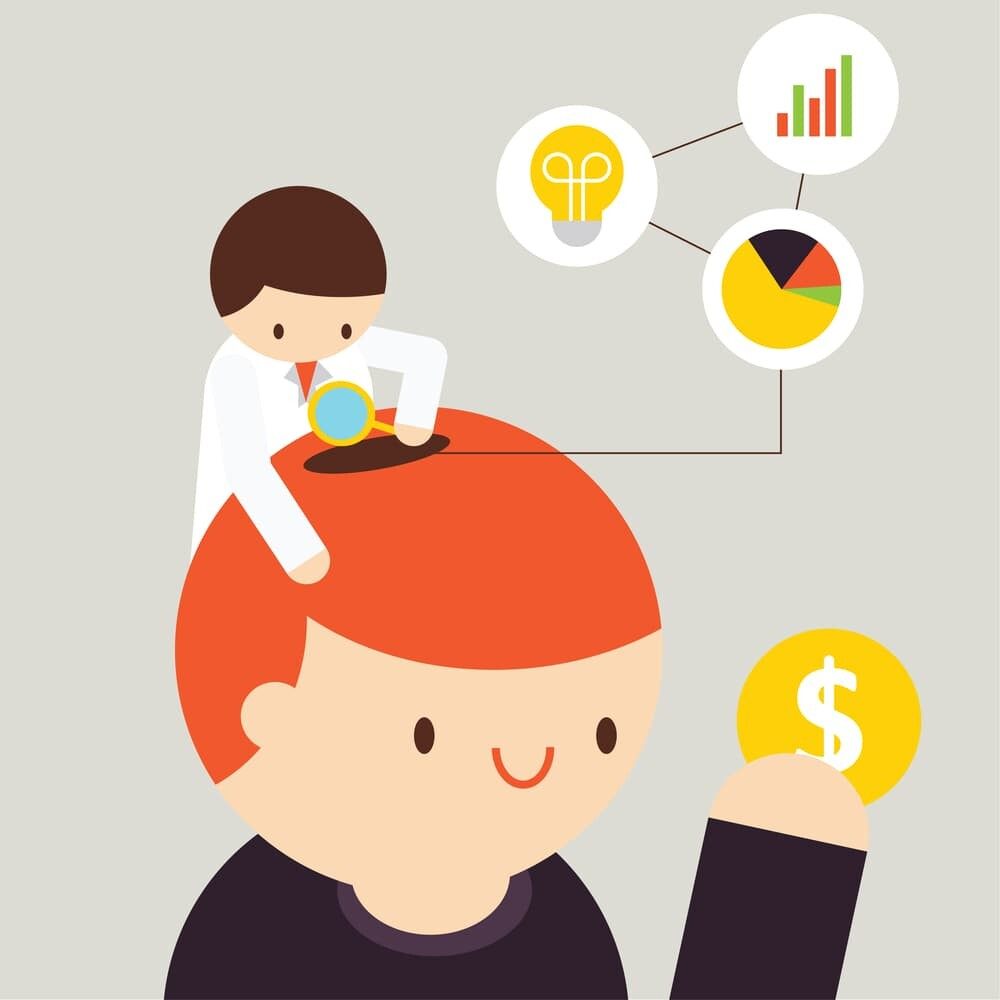

The Customer_Behavior file represents a data set which contains 400 observation and 5 characteristics of customers such as: Id, gender, Age, Salary and weather they purchased or not the company's new product. so from this i want to find out that if the customers purchase related with other factors in the data set or not.

### importing Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import klib as k
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

### Reading dataset 

In [2]:
df=pd.read_csv('./Customer_Behaviour.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Finding Data types 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Finding no.of rows and columns present

In [4]:
df.shape

(400, 5)

### Finding the statistical measures from dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


### Checking the null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Adding  a new column  'Age_status' with respective to  'Age' column and classifying wheather the customer is old adult or young adult

In [7]:
def Age_status(value):
    if value <= 35:
        return "young adult"
    if value >35:
        return "old adult"

In [8]:
df['Age_status'] = df['Age'].map(Age_status)
display(df.sample(40))

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_status
95,15709441,Female,35,44000,0,young adult
33,15776733,Female,28,44000,0,young adult
277,15764604,Male,49,88000,1,old adult
279,15759684,Female,50,36000,1,old adult
318,15742204,Male,45,32000,1,old adult
296,15673539,Male,42,73000,1,old adult
36,15690188,Female,33,28000,0,young adult
366,15574372,Female,58,47000,1,old adult
309,15652400,Female,38,50000,0,old adult
126,15610801,Male,42,65000,0,old adult


<h1 style="font-size: 35px; color:#ff7733;text-align: center;
">EXPLORATORY DATA ANALYSIS</h1>

<h1 style="font-size: 25px; color:#000000;text-align: center;
">BIVARIATE ANALYSIS</h1>

### Drawing pie chart for calculating which gender have purchased more

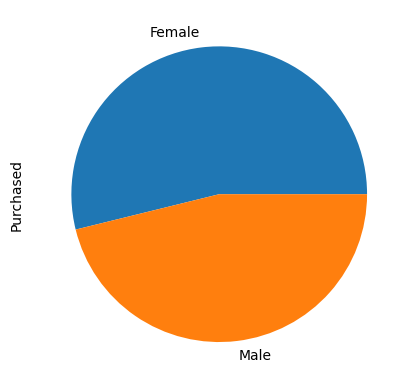

In [9]:
Gender_Purchased = df.groupby(['Gender'])['Purchased'].sum()
Gender_Purchased.plot.pie();

### Drawing plot bar for calculating which gender have purchased more

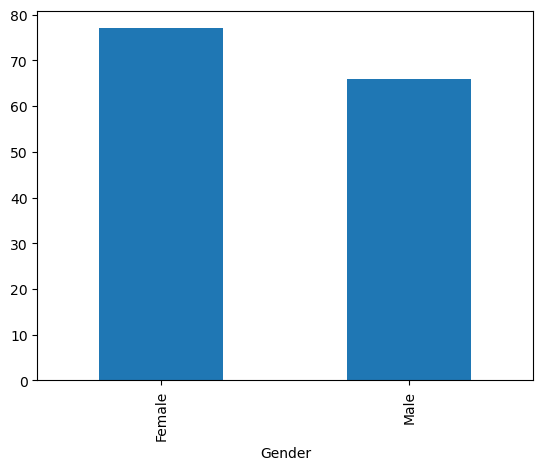

In [10]:
Gender_Purchased.plot.bar();

### Drawing Lineplot with Age_status and purchase

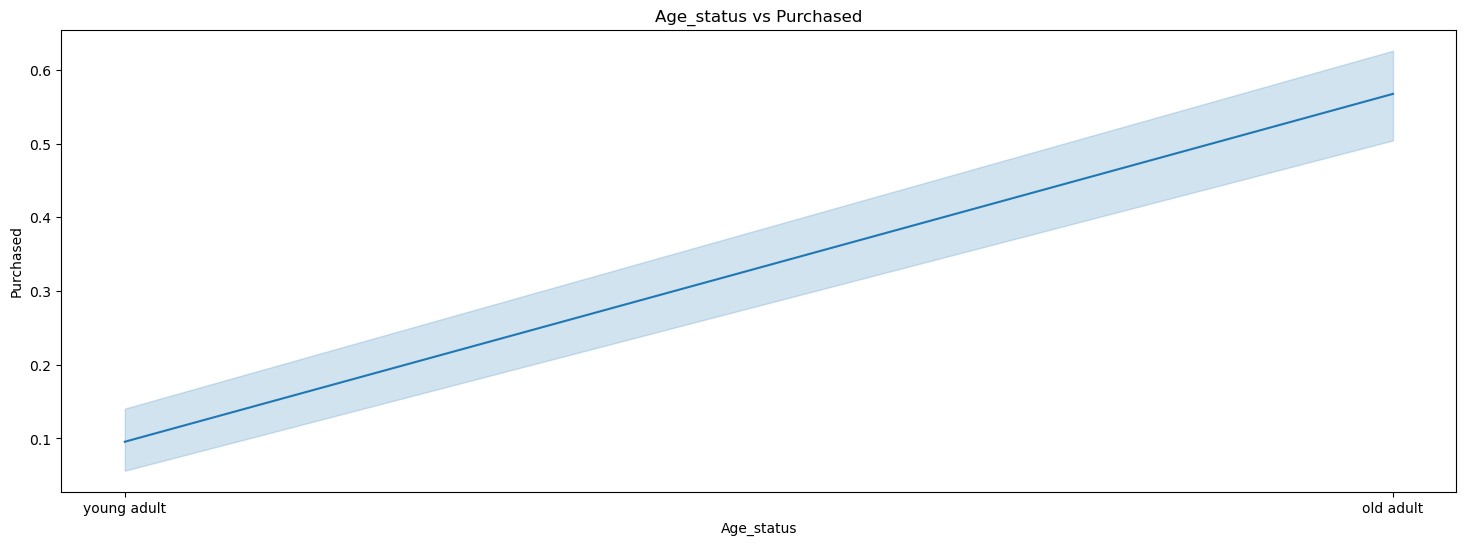

In [11]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Age_status', y='Purchased', data=df)
plt.title("Age_status vs Purchased")
plt.show()

### count plot for showing which age staus gender are more in number

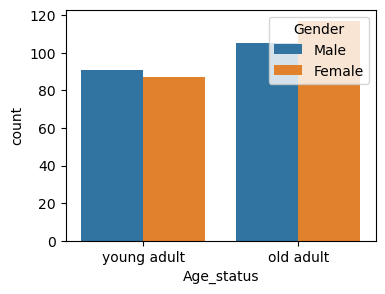

In [12]:
plt.figure(figsize=(4,3))
sns.countplot('Age_status',hue='Gender',data=df)
plt.show()

### factorplot showing that which age grouped gender  have purchased more

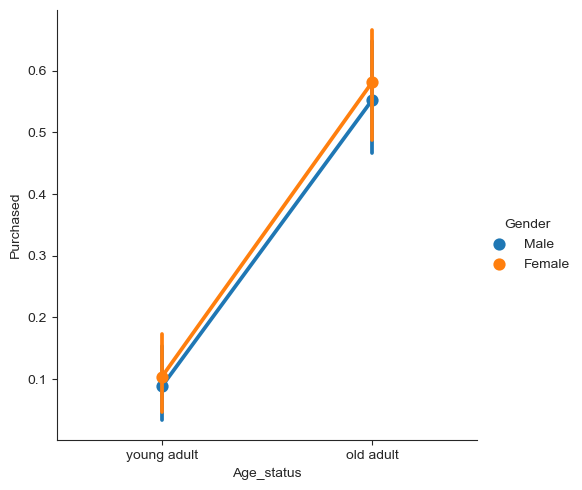

In [13]:
sns.set_style('ticks')
sns.factorplot('Age_status','Purchased',hue='Gender',data=df)
plt.show()

### pairploat from the given dataset

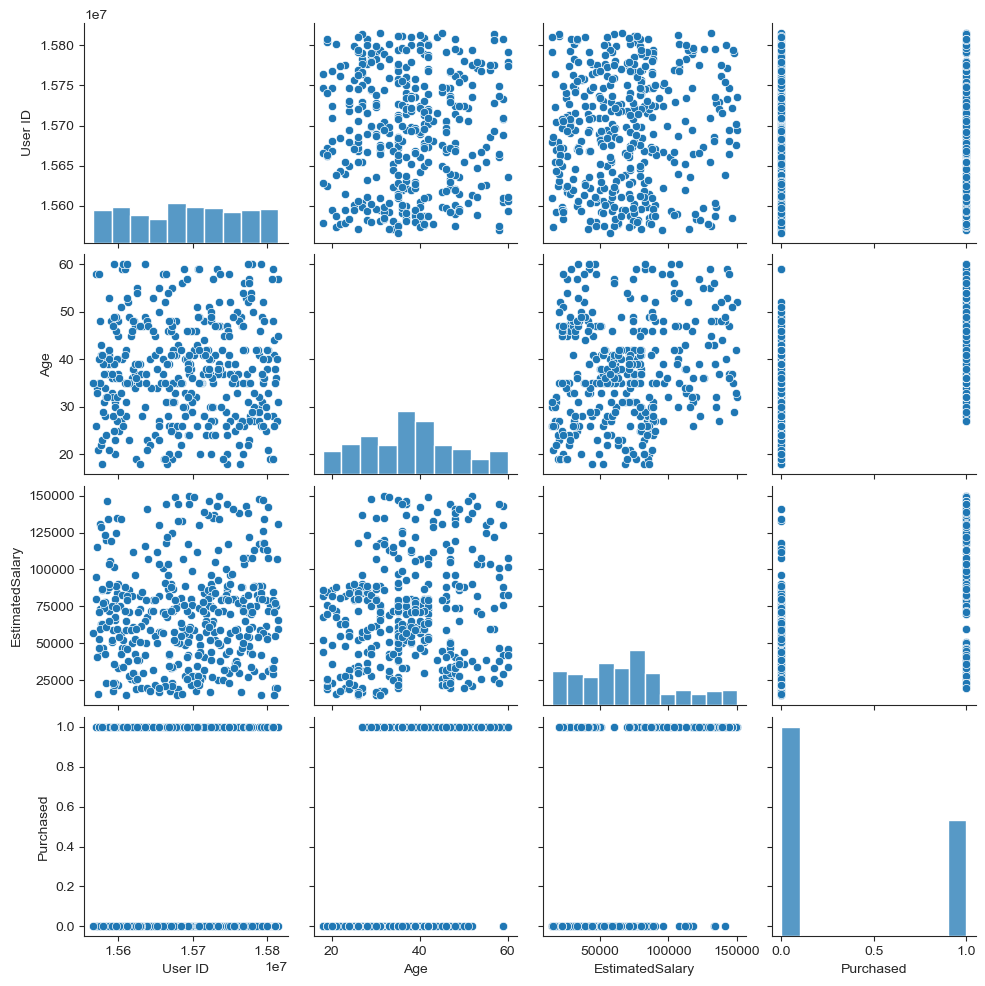

In [14]:
sns.pairplot(data=df)
plt.show()

<h1 style="font-size: 25px; color:#000000;text-align: center;
">UNIVARIATE ANALYSIS</h1>

### Distplot

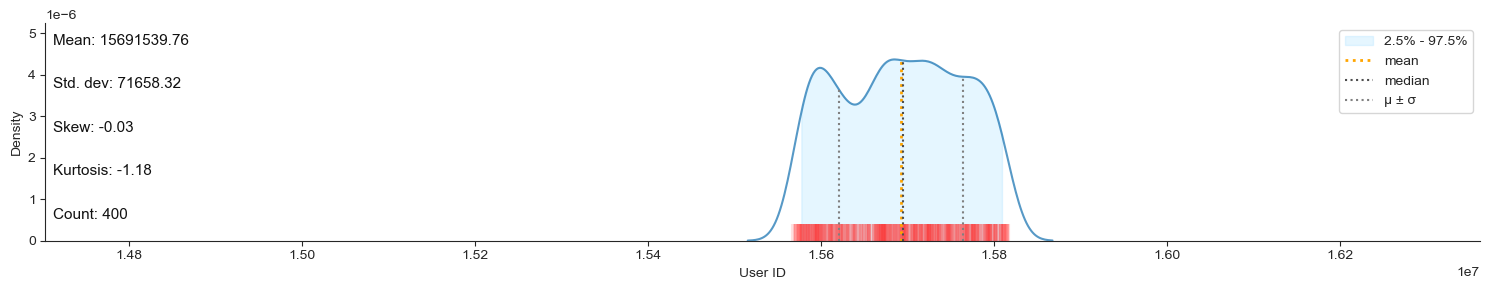

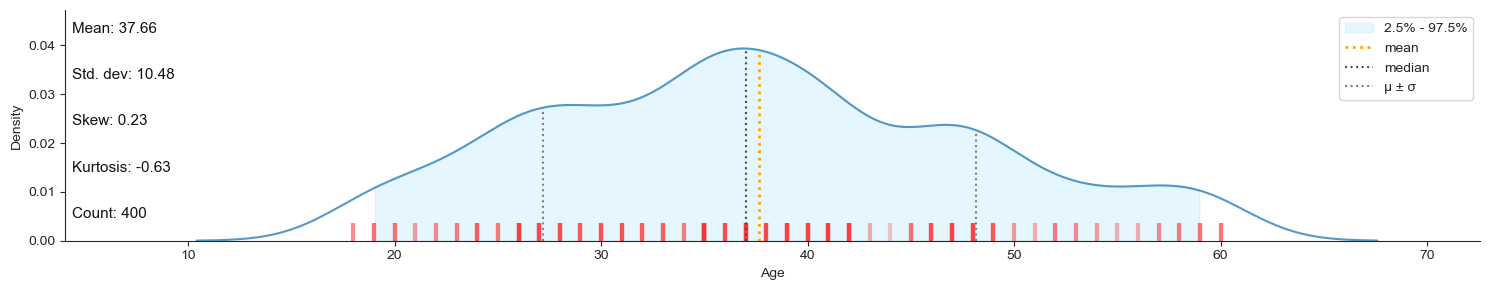

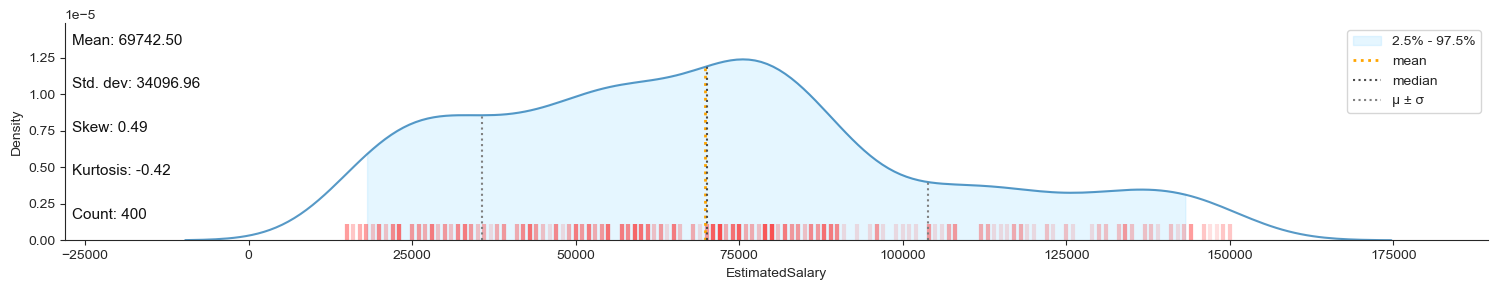

In [17]:
k.dist_plot(data=df);

### Plotting Histplot,kde plot,box plot

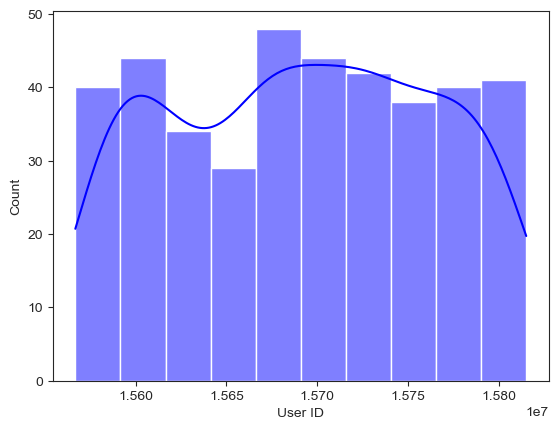

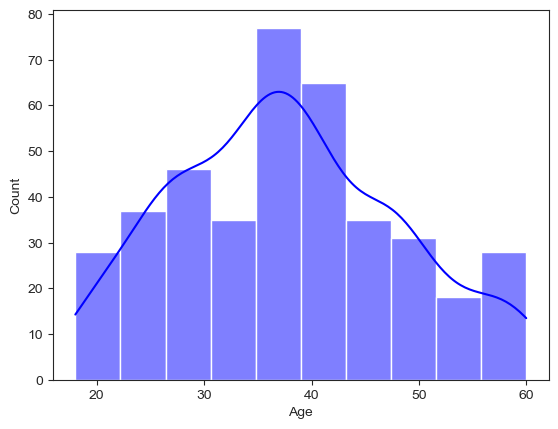

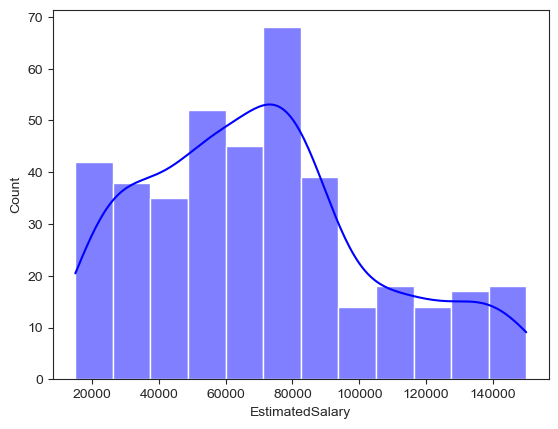

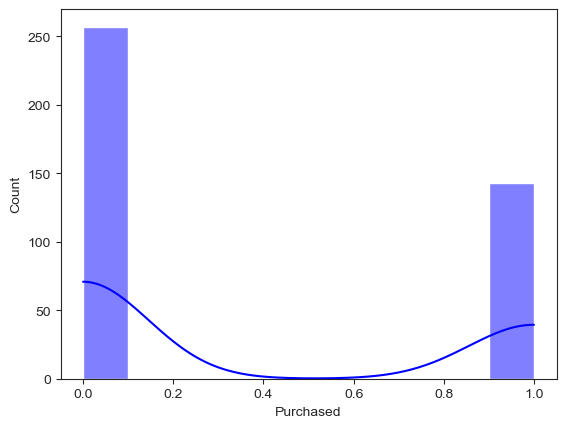

In [18]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i], kde=True, color="blue")
        plt.show()

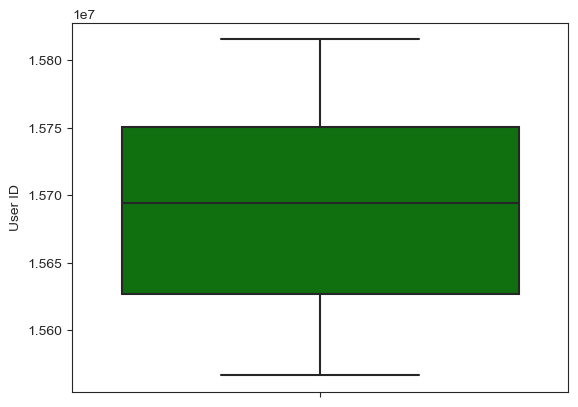

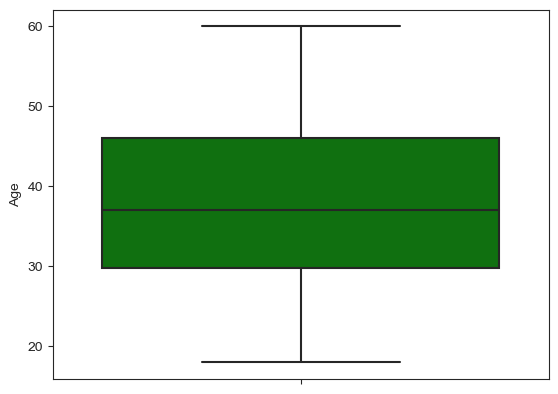

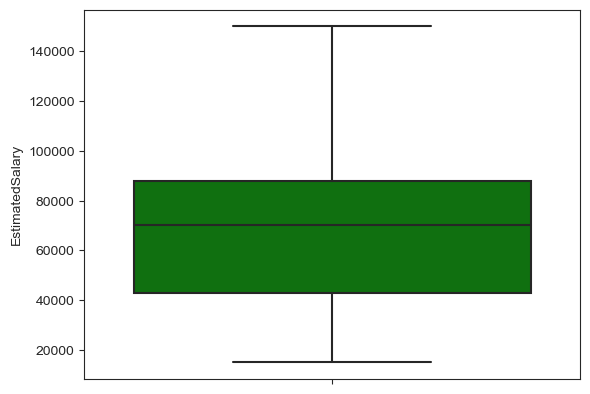

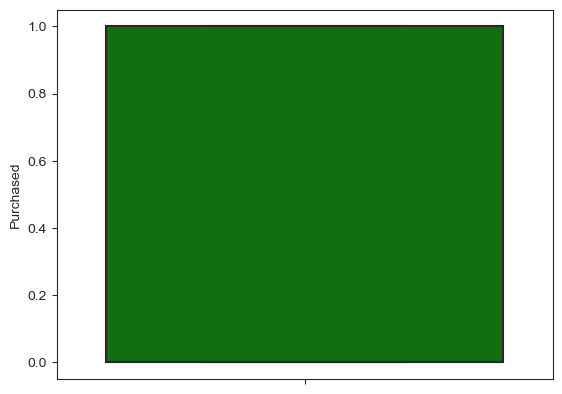

In [19]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

## Using Label encoder to convert categorical columns in to numeric

In [20]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])
df["Age_status"]=le.fit_transform(df['Age_status'])

## Drawing Heatmap to check corelation

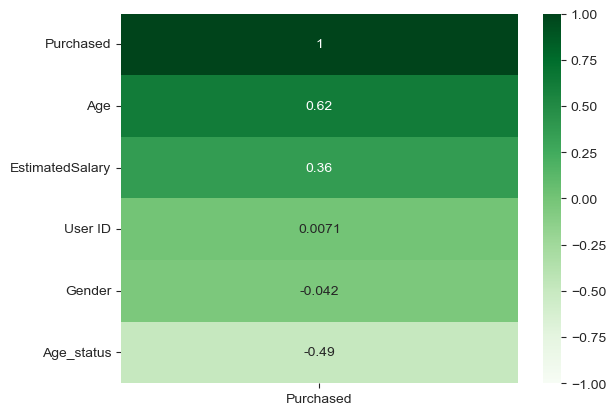

In [21]:
sns.heatmap(df.corr()[["Purchased"]].sort_values(by="Purchased", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

## Taking x and y values

In [31]:
x=df[['EstimatedSalary','Age',]].values
y=df[['Purchased']].values

## Model building & Fitting

In [32]:
sc=StandardScaler()
x= sc.fit_transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [34]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [35]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.8225
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.8324999999999999
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.89
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.885
****************************************************************************************************


In [36]:
model = GradientBoostingClassifier()

In [37]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with GradientBoostingClassifier()
Model accuracy on train is::  0.971875
Model accuracy on test is::  0.925
confusion_matrix train is::  [[196   3]
 [  6 115]]
confusion_matrix test is::  [[55  3]
 [ 3 19]]
Wrong Predictions made: 2552 / 6400
************************************************************


## predicting values and comparing with Actual

In [38]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.head()

,ACTUAL,PREDICTION
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## plotting result with graph

Model used is::  GradientBoostingClassifier()


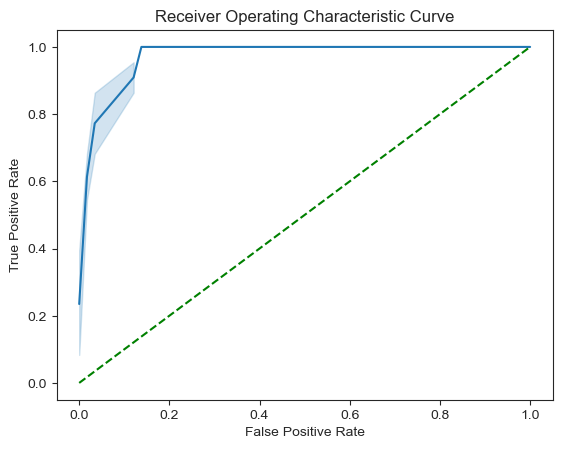

In [39]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("Model used is:: ", model)
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

## Conclusion

After the Calculations and Eda analysis i found that the purchase made by the customer is depending upon other variables in the dataset and there is correlation is Existing in dataset.we can see the result by plotting ReceiverOperatingCharacteristic Curve.